In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import scipy.stats as st


In [13]:
#Import Files
data=pd.read_csv('D:/MSU DATA/Project1/salaries.csv')
data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Data Analyst,65000,GBP,79976,ES,100,GI,L
1,2023,SE,FT,Business Intelligence Analyst,115600,USD,115600,US,0,US,M
2,2023,SE,FT,Business Intelligence Analyst,79700,USD,79700,US,0,US,M
3,2023,EN,FT,Applied Scientist,281700,USD,281700,US,0,US,M
4,2023,EN,FT,Applied Scientist,141100,USD,141100,US,0,US,M


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8270 non-null   int64 
 1   experience_level    8270 non-null   object
 2   employment_type     8270 non-null   object
 3   job_title           8270 non-null   object
 4   salary              8270 non-null   int64 
 5   salary_currency     8270 non-null   object
 6   salary_in_usd       8270 non-null   int64 
 7   employee_residence  8270 non-null   object
 8   remote_ratio        8270 non-null   int64 
 9   company_location    8270 non-null   object
 10  company_size        8270 non-null   object
dtypes: int64(4), object(7)
memory usage: 710.8+ KB


In [15]:
#effect of remote work on pay
rem=data.groupby('remote_ratio').mean()['salary_in_usd'].reset_index()
rem=rem.sort_values('salary_in_usd',ascending=False)
rem
#plot

C:\Users\Swati\AppData\Local\Temp\ipykernel_5140\3913442522.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rem=data.groupby('remote_ratio').mean()['salary_in_usd'].reset_index()


,remote_ratio,salary_in_usd
0,0,155707.497851
2,100,144128.597222
1,50,82441.239631


C:\Users\Swati\AppData\Local\Temp\ipykernel_5140\828644753.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rem=data.groupby('remote_ratio').mean()['salary_in_usd'].reset_index()


Text(0.5, 0, ' Remote Ratio')

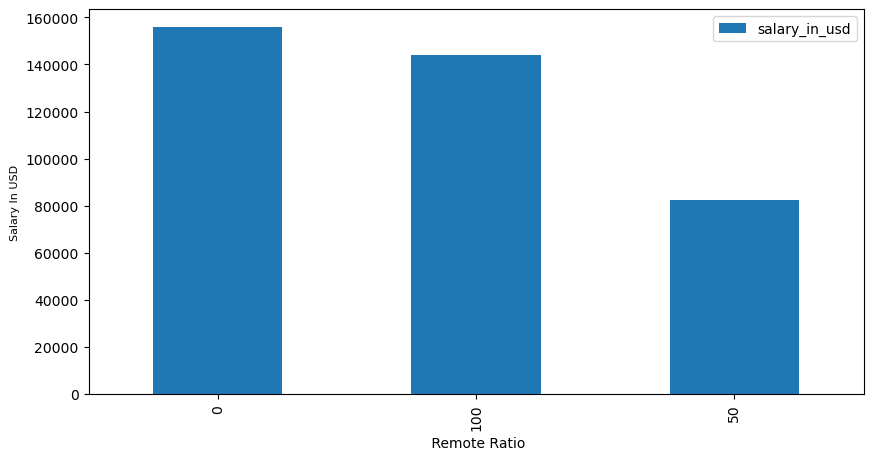

In [16]:
#effect of remote work on pay
rem=data.groupby('remote_ratio').mean()['salary_in_usd'].reset_index()
rem=rem.sort_values('salary_in_usd',ascending=False)
rem
#plot
rem.plot(kind='bar',figsize=(10,5),x='remote_ratio',y='salary_in_usd')

plt.ylabel('Salary In USD', size=8) 
plt.xlabel(' Remote Ratio') 


C:\Users\Swati\AppData\Local\Temp\ipykernel_5140\2027377467.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rem=data.groupby('remote_ratio').mean()['salary_in_usd'].reset_index()


Text(0.5, 0, 'Average Pay Per Remote Ratio')

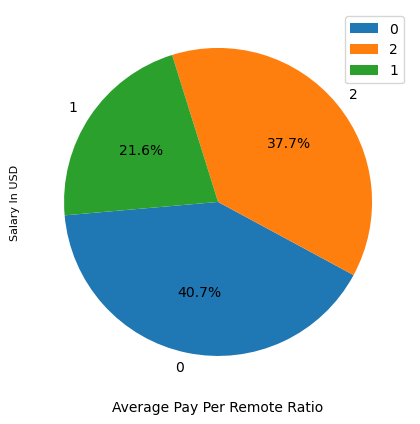

In [17]:
rem=data.groupby('remote_ratio').mean()['salary_in_usd'].reset_index()
rem=rem.sort_values('salary_in_usd',ascending=False)
rem
#plot
rem.plot(kind='pie',figsize=(10,5),x='remote_ratio',y='salary_in_usd',startangle=185,autopct='%1.1f%%')
plt.ylabel('Salary In USD', size=8) 
plt.xlabel('Average Pay Per Remote Ratio') 

In [22]:
# Replace specific values in the 'remote_ratio' column
data['remote_ratio'] = data['remote_ratio'].replace({0: 'In-office', 50: 'Hybrid', 100: 'Fully Remote'})

# Calculate the distribution of values in the 'remote_ratio' column
remote_ratio_distribution = data['remote_ratio'].value_counts()

# Print the heading for remote work ratio distribution
print('Remote Work Ratio Distribution:')

# Print the distribution of remote work ratios
print(remote_ratio_distribution)

Remote Work Ratio Distribution:
In-office       4885
Fully Remote    3168
Hybrid           217
Name: remote_ratio, dtype: int64


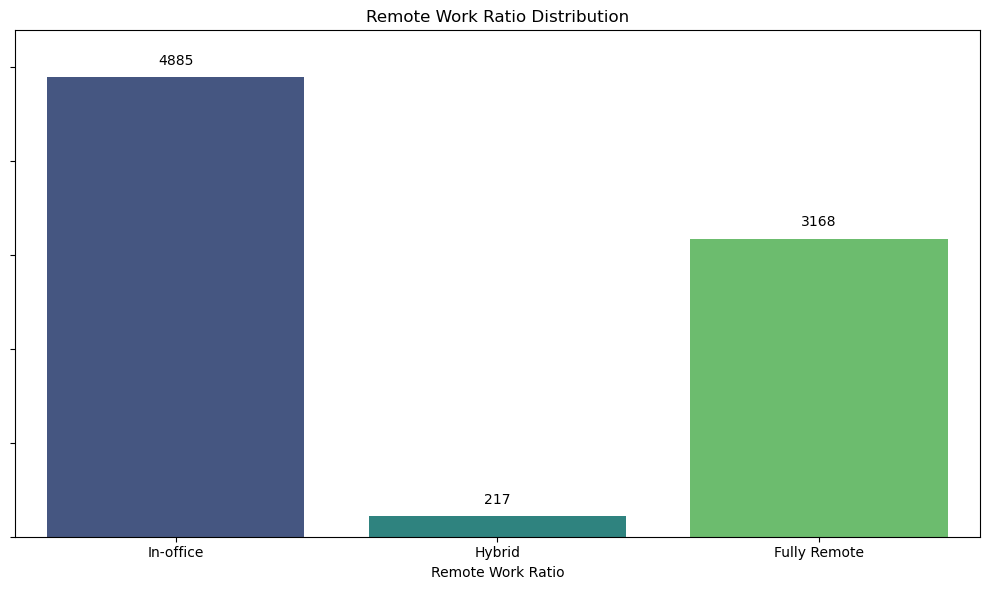

In [23]:
import seaborn as sns

# Reindex the 'remote_ratio_distribution' Series to ensure the desired order of categories: 'In-office', 'Hybrid', 'Fully Remote'
remote_ratio_distribution = remote_ratio_distribution.reindex(['In-office', 'Hybrid', 'Fully Remote'])


# Create a new figure for the plot with a specific size of 10 inches in width and 6 inches in height
plt.figure(figsize=(10, 6))

# Generate a bar plot using seaborn's 'barplot' function
barplot = sns.barplot(x=remote_ratio_distribution.index, y=remote_ratio_distribution.values, palette='viridis')
# The x-axis represents the categories from the 'remote_ratio_distribution' index,
# the y-axis represents the count values from the 'remote_ratio_distribution' values,
# and the color palette is set to 'viridis'.

# Add text annotations to the bars
for i, value in enumerate(remote_ratio_distribution.values):
    # Iterate over the values in the 'remote_ratio_distribution' values
    barplot.text(i, value + 100, f'{value}', ha='center', va='bottom')
    # Add text annotations to the bars, displaying the count values just above each bar.

# Add a title to the plot as 'Remote Work Ratio Distribution'
plt.title('Remote Work Ratio Distribution')

# Label the x-axis as 'Remote Work Ratio'
plt.xlabel('Remote Work Ratio')

# Remove the y-axis label
plt.ylabel('')

# Remove the y-axis tick labels
barplot.set_yticklabels([])

# Adjust the y-axis limit to improve the visibility of the bars and annotations
plt.ylim(0, remote_ratio_distribution.max() + 500)

# Improve the spacing between the elements of the plot
plt.tight_layout()

# Display the plot
plt.show()